In [15]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import sh
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)


from useful import *

moist_dir = '/scratch/ap587/gfdl_data/'
dry_dir = '/scratch/ap587/dry_data/'

plot_dir = '/scratch/ap587/plots/moist_dry_compare/'
mkdir = sh.mkdir.bake('-p')
mkdir(plot_dir)

In [26]:
def compare2(ds1, ds2, title1='', title2=''):
    ulev = np.arange(-80,80,10)
    tlev = np.arange(160,300,10)   
    psilev = np.array([-18e10, -15e10, -12e10, -9e10, -6e10, -5e10, -4e10, -3e10, -2e10, -1e10, -0.5e10, 0.5e10,
                       1e10, 2e10, 3e10, 4e10,5e10, 6e10, 9e10, 12e10, 15e10, 18e10])
    uvlev = np.linspace(-9e6,9e6,20)
    
    fig, axes = plt.subplots(2,2, figsize=(12, 10), sharey=True, sharex=True)    
    x = ds1.lat.values
    y = ds1.pfull.values
    X1, Y1 = np.meshgrid(x, y)
    x = ds2.lat.values
    y = ds2.pfull.values    
    X2, Y2 = np.meshgrid(x, y)
      
    ###
    plt.text(0.5, 0.93, title1, fontsize=14, transform=fig.transFigure, horizontalalignment='center')
    ###
    axes[0,0].contour(X1, Y1, ds1.ucomp, ulev, add_colorbar=False, robust=True, colors='k')
    ds1.temp.plot.contourf(x='lat', y='pfull', ax=axes[0,0], add_colorbar=False, extend='both',
                           robust=True, levels=tlev)
    axes[0,0].set_xlabel('')
    axes[0,0].set_ylabel('Pressure (hPa)')
    axes[0,0].set_title('temp & zonal wind')
 
    ds1.psi.plot.contourf(x='lat', y='pfull', ax=axes[0,1], levels=psilev, add_colorbar=False, extend='both')
    if 'uv_dy' in ds1.keys():
        axes[0,1].contour(X1, Y1, ds1.uv, levels=uvlev, robust=True,  colors='k')
    axes[0,1].set_xlabel('')
    axes[0,1].set_ylabel('')
    axes[0,1].set_title("streamfunction & eddies (u'v')")
    
    ###
    plt.text(0.5, 0.5, title2, fontsize=14, transform=fig.transFigure, horizontalalignment='center')
    ###
    axes[1,0].contour(X2, Y2, ds2.ucomp, ulev, add_colorbar=False, robust=True, colors='k')
    ds2.temp.plot.contourf(x='lat', y='pfull', ax=axes[1,0], add_colorbar=False, extend='both',
                           robust=True, levels=tlev)
    axes[1,0].set_xlabel('Latitude')
    axes[1,0].set_ylabel('Pressure (hPa)')
    
    ds2.psi.plot.contourf(x='lat', y='pfull', ax=axes[1,1], levels=psilev, add_colorbar=False, extend='both')
    if 'uv_dy' in ds2.keys():
        axes[1,1].contour(X2, Y2, ds2.uv, levels=uvlev, robust=True,  colors='k')
    axes[1,1].set_xlabel('Latitude')  
    axes[1,1].set_ylabel('')  
    
    axes[1,1].set_xticks(np.arange(-60,61,30))
    axes[1,1].invert_yaxis()
    

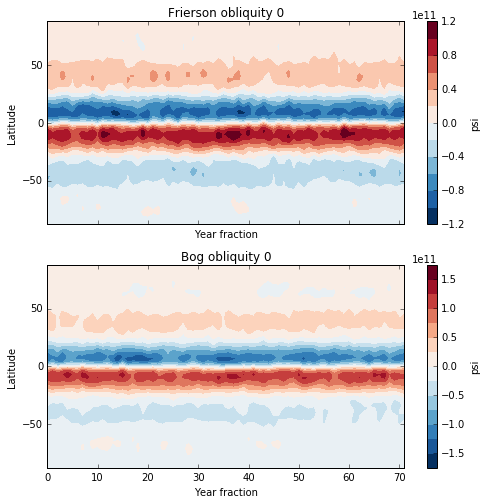

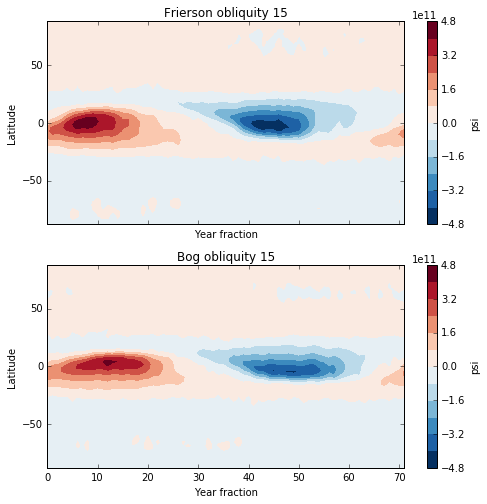

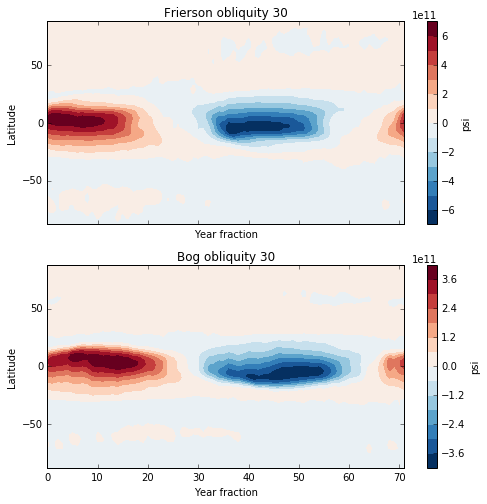

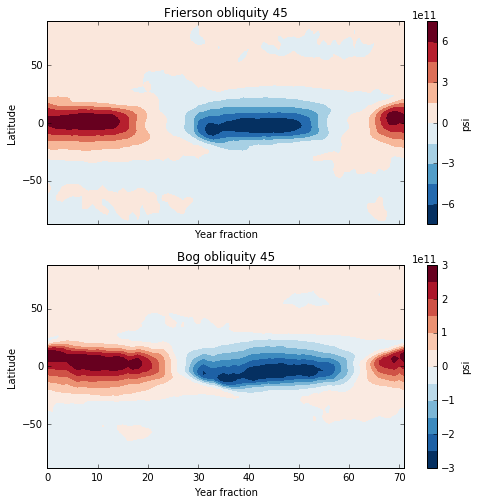

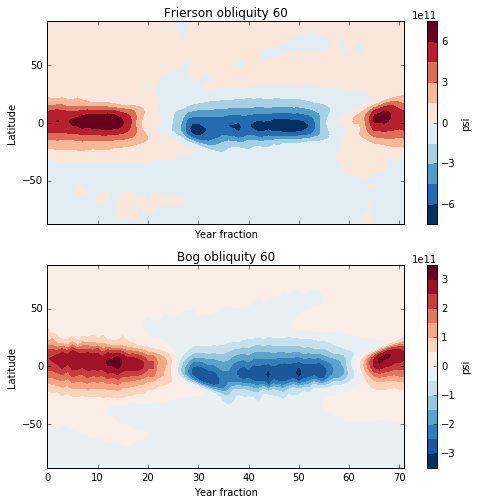

In [48]:
obls = np.arange(0,61,15)
plot_dir = '/scratch/ap587/plots/fri_bog_compare/'
mkdir = sh.mkdir.bake('-p')
mkdir(plot_dir)
for obl in obls:
    fig, axes = plt.subplots(2,1, figsize=(8,8), sharex=True)
    exp = 'frierson_hc10-obl{}'.format(obl)
    ds = open_climatology(moist_dir, exp)
    ds.psi.isel(pfull=-13).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[0])

    exp = 'bog_ruthparams_hc10-obl{}'.format(obl)
    ds = open_climatology(moist_dir, exp)
    ds.psi.isel(pfull=-13).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[1])

    axes[0].set_title('Frierson obliquity {}'.format(obl))    
    axes[0].set_xlabel('Year fraction')
    axes[0].set_ylabel('Latitude')
    axes[1].set_title('Bog obliquity {}'.format(obl))
    axes[1].set_xlabel('Year fraction')
    axes[1].set_ylabel('Latitude')
    
    savename = 'fri_bog_psi_obl{}'.format(obls[i]) 
    plt.savefig(plot_dir + savename + '.pdf', dpi=200,bbox_inches='tight',transparent=False)    

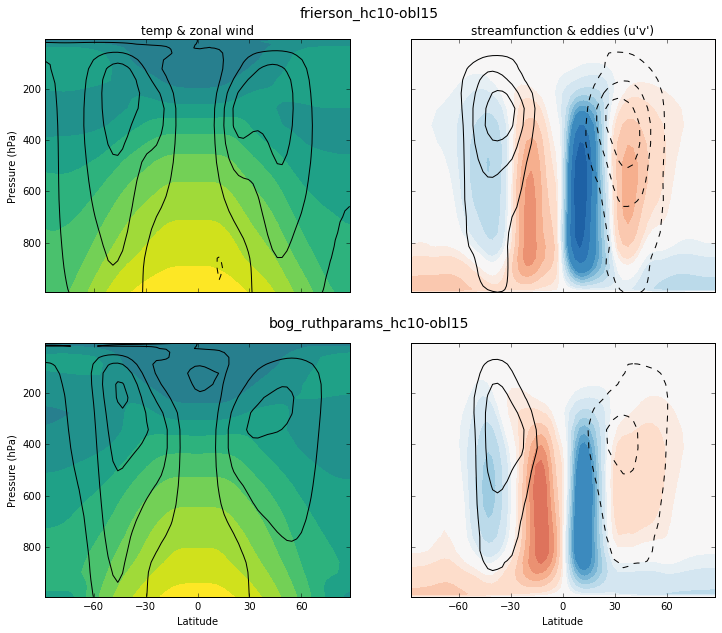

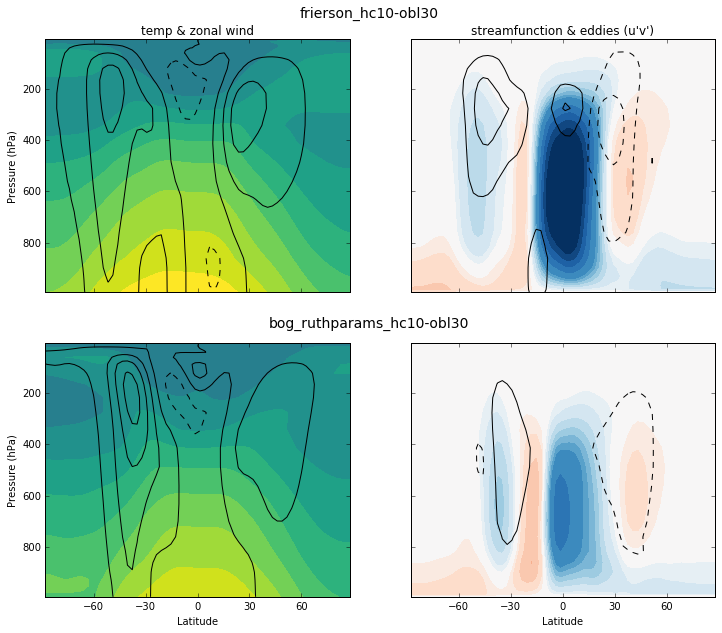

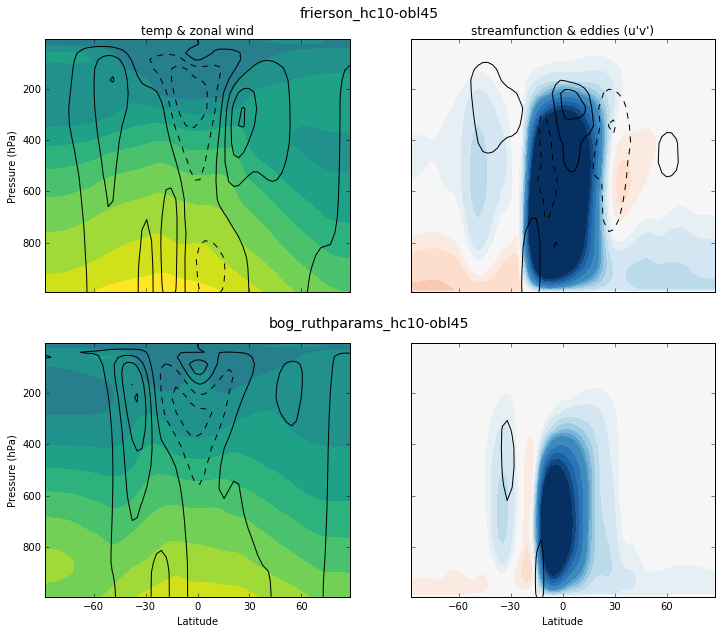

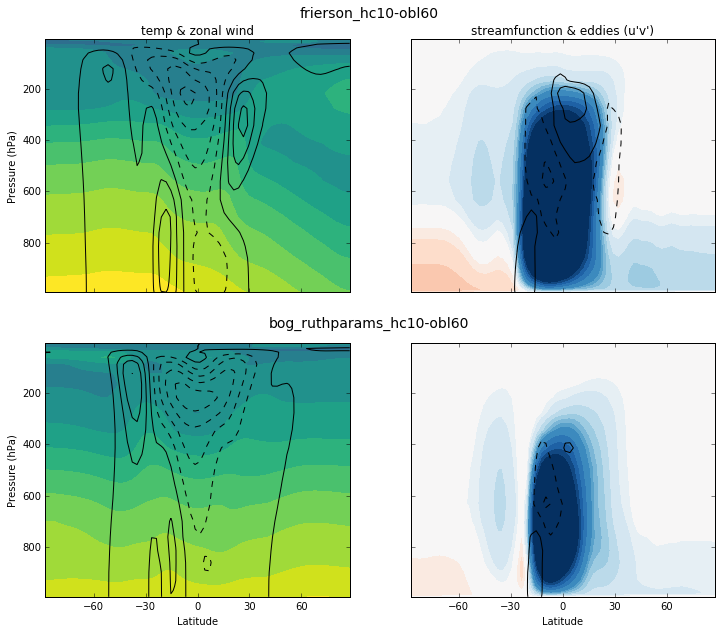

In [33]:
'''comparison of bog runs and frierson'''
from plotting import plot_twocol
fri_exps = []
bog_exps = []
obls = np.arange(15,61,15)
for obl in obls:
    bog_exps += ['bog_ruthparams_hc10-obl{}'.format(obl)]
    fri_exps += ['frierson_hc10-obl{}'.format(obl)]

s_slice = np.arange(10,15)+18
tlev = np.arange(180, 320, 20)
psilev = psilev = np.array([-15e10, -12e10, -9e10, -6e10,-5e10, -4e10, -3e10, -2e10, -1e10,
                                1e10, 2e10, 3e10, 4e10,5e10, 6e10, 9e10, 12e10, 15e10])
ulev = np.arange(-75, 76, 10)

plot_dir = '/scratch/ap587/plots/fri_bog_compare/'
mkdir = sh.mkdir.bake('-p')
mkdir(plot_dir)

for i in range(len(bog_exps)):
    dsb = open_climatology(moist_dir, bog_exps[i])
    dsf = open_climatology(moist_dir, fri_exps[i])
    dssb = dsb.isel(pentad=s_slice).mean('pentad')    
    dssf = dsf.isel(pentad=s_slice+2).mean('pentad')
    compare2(dssf, dssb, fri_exps[i], bog_exps[i])
    
    savename = 'fri_bog_eq_obl{}'.format(obls[i]) 
    plt.savefig(plot_dir + savename + '.pdf', dpi=200,bbox_inches='tight',transparent=False)

In [99]:
'''the moist experiments are run with a mixed layer depth of 2.5m, dry with 10m'''
do_axi = 1
obls = np.arange(0,91,15)

if do_axi:
    moist_exps = ['frierson-axi_obl{}'.format(obl) for obl in obls]
    dry_exps = ['exp9v1_hc10.0-obl{:.1f}'.format(obl) for obl in obls]
else:
    moist_exps = ['frierson_hc10-obl{}'.format(obl) for obl in obls]
    dry_exps = ['exp9v2_hc10.0-obl{:.1f}'.format(obl) for obl in obls]

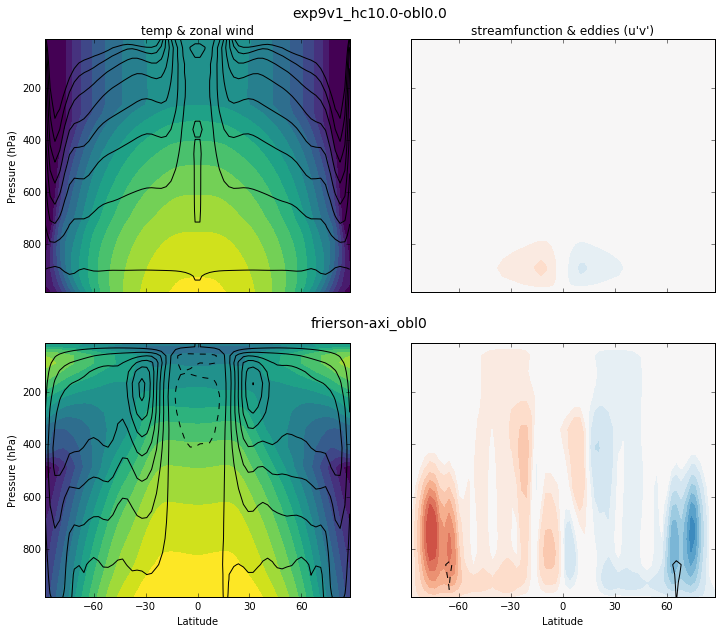

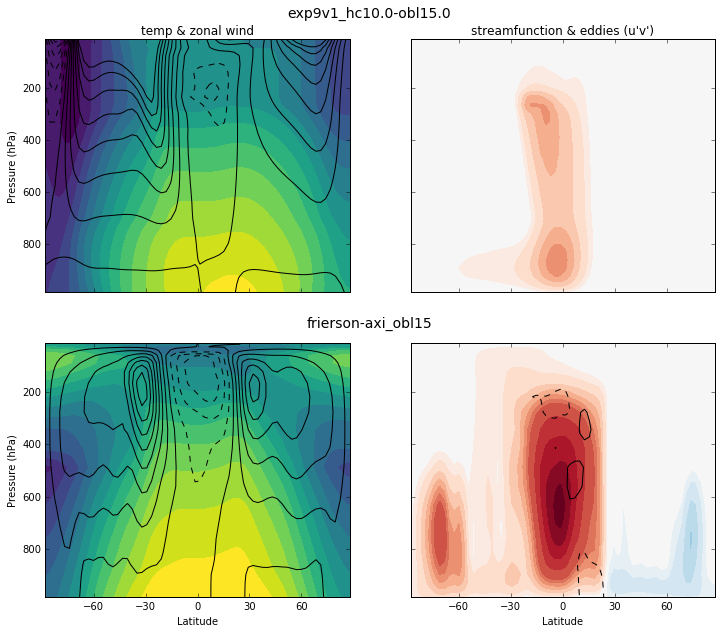

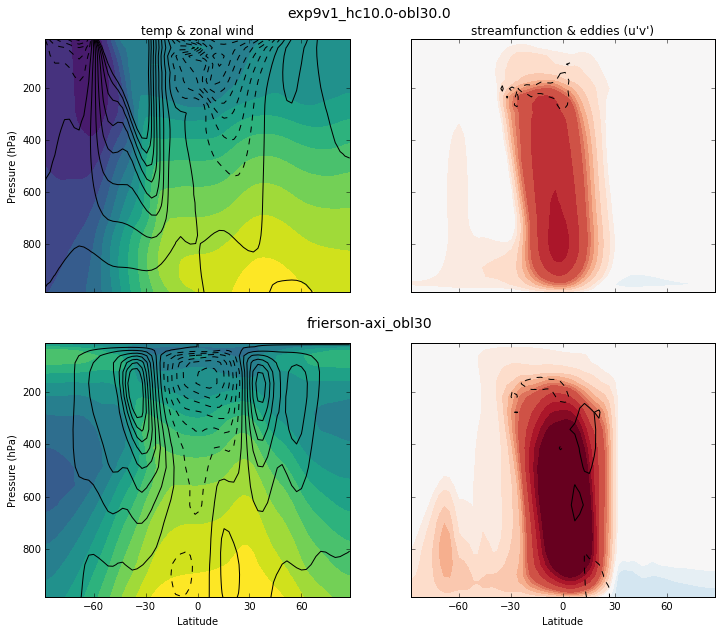

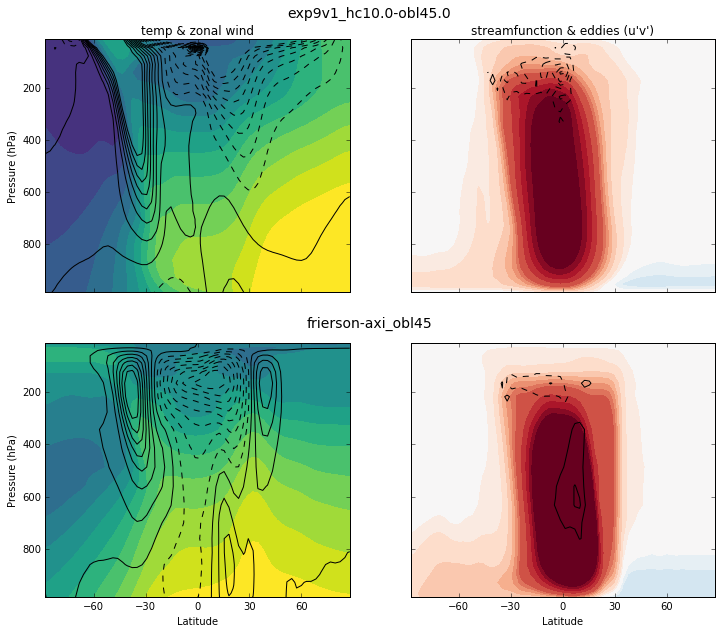

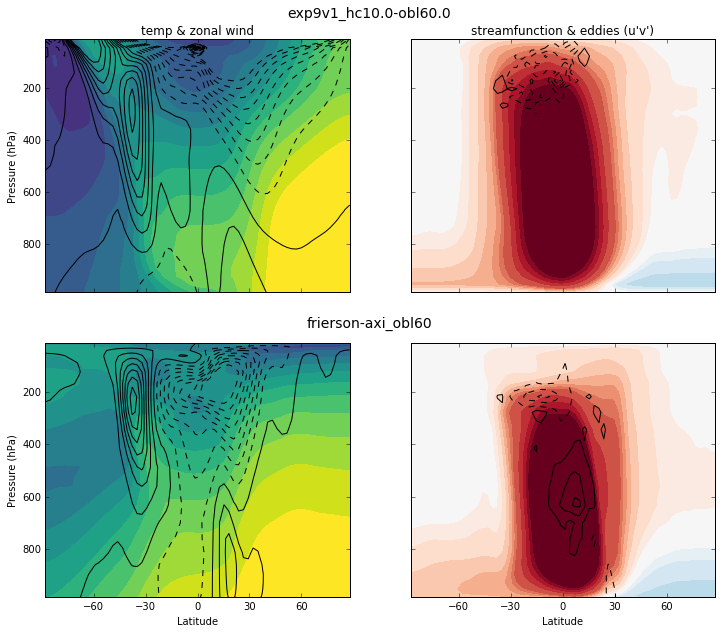

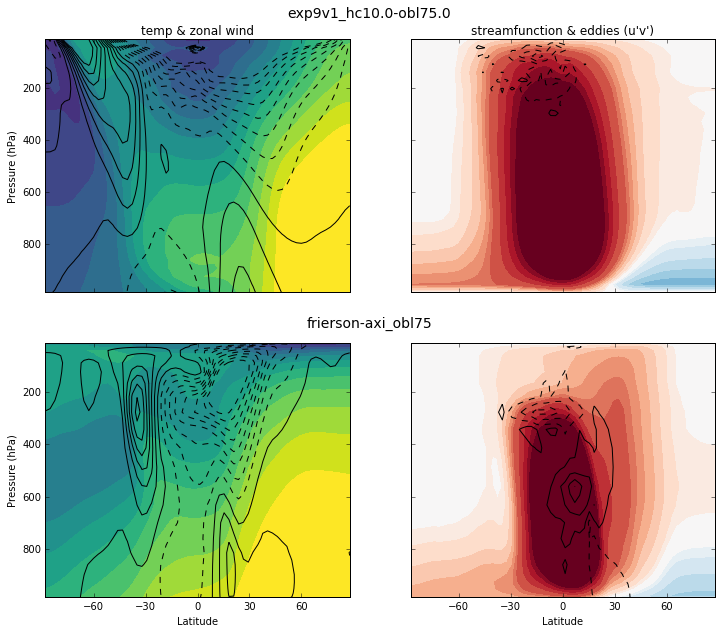

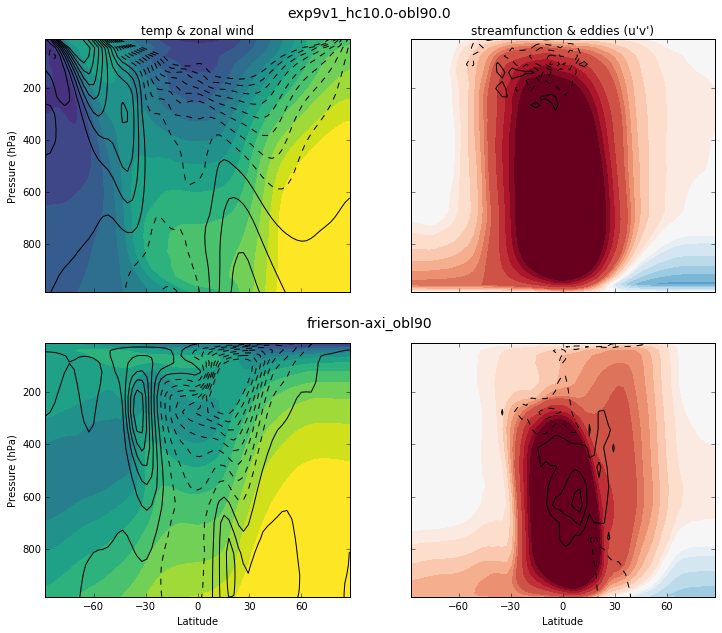

In [100]:
plot_dir = '/scratch/ap587/plots/moist_dry_compare/'
mkdir = sh.mkdir.bake('-p')
mkdir(plot_dir)

for i in range(len(moist_exps)):
    dd = open_climatology(dry_dir, dry_exps[i])
    md = open_climatology(moist_dir, moist_exps[i])    
    if do_axi:
        savename = 'axi_'
    else:
        savename = '3d_'
        
    do_seasonal = 1
    if do_seasonal:
        dd = dd.isel(pentad=np.arange(26,44)).mean('pentad')
        md = md.isel(pentad=np.arange(0,18)).mean('pentad')    
        savename += 'solstice_'
    else:
        dd = dd.mean('pentad')
        md = md.mean('pentad')
        savename += 'mean_'
    
    compare2(dd, md, title1=dry_exps[i], title2=moist_exps[i])
    savename += 'hc10-obl{}'.format(obls[i])
    plt.savefig(plot_dir + savename + '.pdf', dpi=200,bbox_inches='tight',transparent=False)

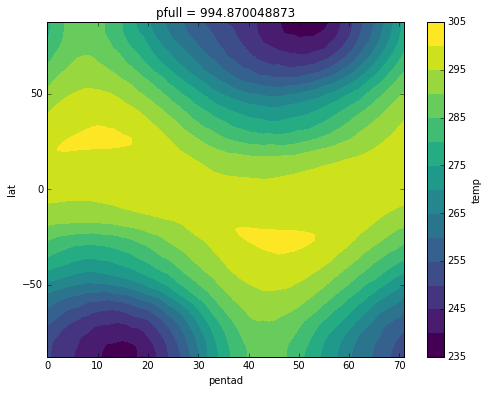

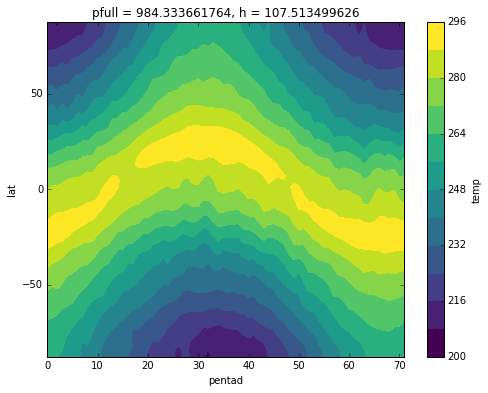

In [96]:
ds = open_climatology(moist_dir, moist_exps[2])
ds.isel(pfull=-1).temp.plot.contourf(x='pentad', levels=15)

ds = open_climatology(dry_dir, dry_exps[1])
plt.subplots()
ds.isel(pfull=-1).temp.plot.contourf(x='pentad', levels=15)